#Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

my usual imports and setups

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load WINTER (Dec. 2014 - Feb. 2014) and SUMMER (Jun. - Aug. 2015) data in Pandas dataframes
import requests, zipfile, StringIO

# WINTER
r0 = requests.get('https://s3.amazonaws.com/tripdata/201412-citibike-tripdata.zip')
z0 = zipfile.ZipFile(StringIO.StringIO(r0.content))
dec = pd.read_csv(z0.open('201412-citibike-tripdata.csv'))

r1 = requests.get('https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip')
z1 = zipfile.ZipFile(StringIO.StringIO(r1.content))
jan = pd.read_csv(z1.open('201501-citibike-tripdata.csv'))

r2 = requests.get('https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip')
z2 = zipfile.ZipFile(StringIO.StringIO(r2.content))
feb = pd.read_csv(z2.open('201502-citibike-tripdata.csv'))

# SUMMER
r6 = requests.get('https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip')
z6 = zipfile.ZipFile(StringIO.StringIO(r6.content))
jun = pd.read_csv(z6.open('201506-citibike-tripdata.csv'))

r7 = requests.get('https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip')
z7 = zipfile.ZipFile(StringIO.StringIO(r7.content))
jul = pd.read_csv(z7.open('201507-citibike-tripdata.csv'))

r8 = requests.get('https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip')
z8 = zipfile.ZipFile(StringIO.StringIO(r8.content))
aug = pd.read_csv(z8.open('201508-citibike-tripdata.csv'))

In [3]:
# Combine aggregates months data into seasons data

df_W = dec.append([jan, feb])
df_S = jun.append([jul, aug])

#print df_W.describe()
#print df_S.describe()

In [4]:
# Reset indices on combined tables
df_W = df_W.reset_index()
df_S = df_S.reset_index()

## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [5]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

lets split age in 10 year bins. see the comment in assignment 1 about this

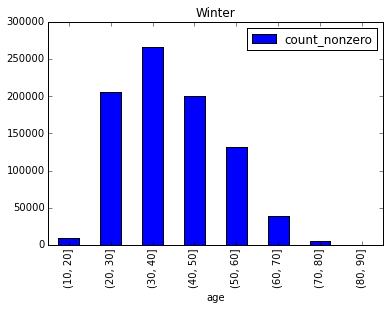

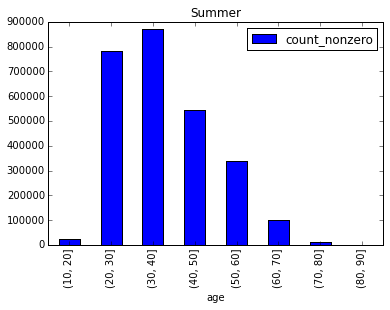

In [6]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
    

how do they look? what should I expect? setting some expectation is useful as a sanity check!

LL: They look relatively similar in shape; however, it appears that in the summer, there is a higher proportion of younger riders  (ages 21-30). I would expect that there are fewer older (age 50+) in the winter and possibly more young riders in the summer due to college summer breaks and the propensity of young people to enjoy the nice weather.  

lets run the scipy KS test

#KS testsfor goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [7]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, Poisson fit", ksW
print "summer, Poisson fit", ksS

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
winter, Poisson fit KstestResult(statistic=0.99999880158020016, pvalue=0.0)
summer, Poisson fit KstestResult(statistic=0.99999963442994877, pvalue=0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

In [9]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, gamma fit", ksW
print "summer, gamma fit", ksS

winter, gamma fit KstestResult(statistic=1.0, pvalue=0.0)
summer, gamma fit KstestResult(statistic=1.0, pvalue=0.0)


or i can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

In [10]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [11]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=1066635675.0, pvalue=nan)
summer, normal fit KstestResult(statistic=325371025.0, pvalue=nan)


##TODO FOR YOU!

-- repeat with the AD test, and/or any other tests you wish

-- do you see differences in the sample? significant differences?

-- do you dare (and this is indeed optional but could be fun) splitting the samples by up- and down-town?

##Repeat with the AD test

In [12]:
print W_age_dist.columns

Index([u'count_nonzero'], dtype='object')


In [13]:
ad_W = scipy.stats.anderson(W_age_dist['count_nonzero'], dist='norm')
ad_S = scipy.stats.anderson(S_age_dist['count_nonzero'], dist='norm')
print "winter, normal fit: ", ad_W
print
print "summer, normal fit: ", ad_S

print '\nBased on these results, we cannot reject the null hypothesis that this samples were drawn from the normal \ndistribution at the 0.05 significance level.'

winter, normal fit:  AndersonResult(statistic=0.51257652802639697, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

summer, normal fit:  AndersonResult(statistic=0.51294415781601543, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Based on these results, we cannot reject the null hypothesis that this samples were drawn from the normal 
distribution at the 0.05 significance level.


##Now, I try with the Poisson distribution

In [19]:
print "winter, poisson fit (KS)", scipy.stats.kstest(W_age_dist,'cauchy')
print "summer, poisson fit (KS)", scipy.stats.kstest(S_age_dist,'cauchy')

 winter, poisson fit (KS) KstestResult(statistic=0.99999880158020016, pvalue=0.0)
summer, poisson fit (KS) KstestResult(statistic=0.99999963442994877, pvalue=0.0)


In [20]:
#Based on these results we can reject the null that these samples where drawn from the Poisson/Cauchy distribution. 